trade direction0
order_id:14, 
bought 52@100.50 avg, 
1 trades, remaining:0, FILLED ✓
trade direction0
order_id:23, 
bought 69@99.43 avg, 
1 trades, remaining:0, FILLED ✓
trade direction0
order_id:32, 
bought 10@100.86 avg, 
1 trades, remaining:0, FILLED ✓
trade direction0
order_id:47, 
sold 12@99.73 avg, 
1 trades, remaining:0, FILLED ✓
trade direction0
order_id:53, 
bought 67@99.52 avg, 
1 trades, remaining:0, FILLED ✓
trade direction0
order_id:61, 
bought 47@98.41 avg, 
1 trades, remaining:0, FILLED ✓
trade direction0
order_id:74, 
sold 46@98.38 avg, 
1 trades, remaining:0, FILLED ✓
trade direction0
order_id:88, 
sold 79@99.60 avg, 
1 trades, remaining:0, FILLED ✓
trade direction0
order_id:103, 
sold 27@98.23 avg, 
1 trades, remaining:0, FILLED ✓
trade direction0
order_id:112, 
bought 47@99.31 avg, 
1 trades, remaining:0, FILLED ✓
trade direction0
order_id:124, 
bought 74@98.94 avg, 
1 trades, remaining:0, FILLED ✓
trade direction0
order_id:136, 
sold 97@99.58 avg, 
1 trades, remain

/var/folders/c_/m3x98zjs2bb6cm1g0y7c6v2w0000gn/T/ipykernel_62056/2405883576.py:42: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


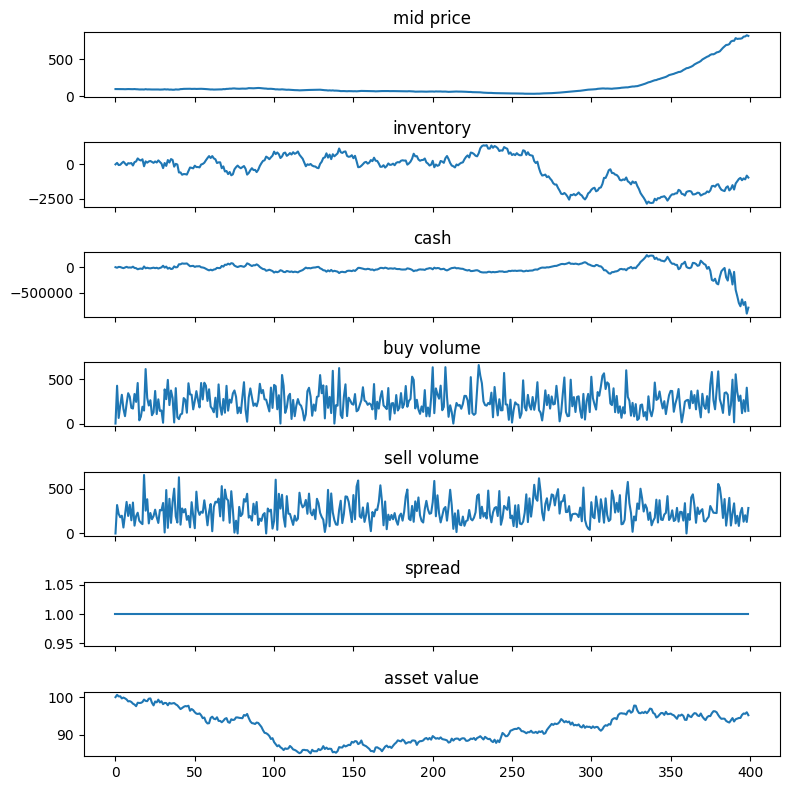

In [ ]:
from lob_sim import (
    OrderBook,
    MarketMaker,
    SkewMarketMakingStrategy,
    InformedTraders,
    Asset,
)
from itertools import chain
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=42)
a = Asset()
ob = OrderBook(min_lifetime=0)
strat = SkewMarketMakingStrategy(1, 1000, 1_000_000_000)
mm = MarketMaker(strat)
it = InformedTraders(1, 10, 100)
timesteps = 400
trades_notifications = []

asset_value = []

for _ in range(timesteps):
    ob.advance()
    quotes, cancellations = mm.update(ob, trades_notifications)
    market_orders = it.generate_orders(a.value, ob.mid_price, rng=rng)
    ob.process_cancellations(cancellations)
    notifs = ob.process_orders(chain(quotes, market_orders))
    print(notifs[0][-1])
    trades_notifications = notifs[1]
    asset_value.append(a.value)
    a.evolve_value(rng=rng)

history = mm.history
fig, ax = plt.subplots(nrows=len(history) + 1, sharex=True, figsize=(8,8))
for idx, (key, value) in enumerate(history.items()):
    ax[idx].plot(value)
    ax[idx].set_title(key)
ax[-1].plot(asset_value)
ax[-1].set_title("asset value")
fig.tight_layout()
fig.show()

